<a href="https://colab.research.google.com/github/lmariemorales/GLY6932/blob/main/LM_HW1_Python_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1: Python basics and "machine learning ready" data preparation

The goal of this assignment is to get you familiar with using the Google Colab interface, performing basic Python operations, and preparing data for analysis.

1. Import the math, matplotlib, numpy, and pandas packages [1 point]
2. download subglacial bed elevation data from Greenland using pandas. [1 point]

  The dataset can be found here: https://raw.githubusercontent.com/GatorGlaciology/Intro-to-ML-course/main/greenland_test_data.csv
  
  It contains X and Y coordinates in polar stereographic units (meters) and ice-penetrating radar bed elevation measurements in meters.
3. Compute the mean, variance, min, and max of the bed elevation data. [1 point]
4. Make a scatter plot of the data that maps the bed elevation data. Add a title, x and y labels, and a colorbar. [2 points]
5. Make a histogram plot of the bed elevation data. Make sure to select an appropriate number of bins. [2 points]
6. Radar data can be quite noisy due to instrumental errors or environmental conditions. Do you spot any outliers? Print a comment about which values you think could be outliers. [1 point]
7. Remove the outliers from the dataset and plot the cleaned dataset. [2 points]

Remember, if you remove values from the bed column, you'll need to remove the corresponding values from the x and y columns


The following Jupyter Books may be useful for learning the programming components of this assignment:

https://www.tomasbeuzen.com/python-programming-for-data-science/README.html



In [102]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd

In [44]:
plt.rcParams.update({'xtick.top':True,
                     'ytick.right':True,
                     'xtick.minor.visible':True,
                     'ytick.minor.visible':True,
                     'xtick.direction':'in',
                     'ytick.direction':'in'})

In [39]:
url = 'https://raw.githubusercontent.com/GatorGlaciology/Intro-to-ML-course/main/greenland_test_data.csv'
df = pd.read_csv(url)
df

,X,Y,Bed
0,-220370.0,-1650000.0,238.3100
1,-220370.0,-1650200.0,237.8400
2,-220370.0,-1650300.0,234.7000
3,-220370.0,-1650400.0,224.5500
4,-220370.0,-1650600.0,212.6900
...,...,...,...
488101,-299736.5,-1653253.0,941.3989
488102,-299820.1,-1653281.0,942.9348
488103,-299852.3,-1653292.0,942.6983
488104,-299922.9,-1653316.0,942.2304


In [40]:
print(f'Mean: {np.mean(df.Bed):0.4f} m')
print(f'Variance: {np.var(df.Bed):0.4f} m')
print(f'Minimum: {np.min(df.Bed):0.4f} m')
print(f'Maximum: {np.max(df.Bed):0.4f} m')

Mean: 254.7087 m
Variance: 33378.6943 m
Minimum: -717.7800 m
Maximum: 999.9527 m


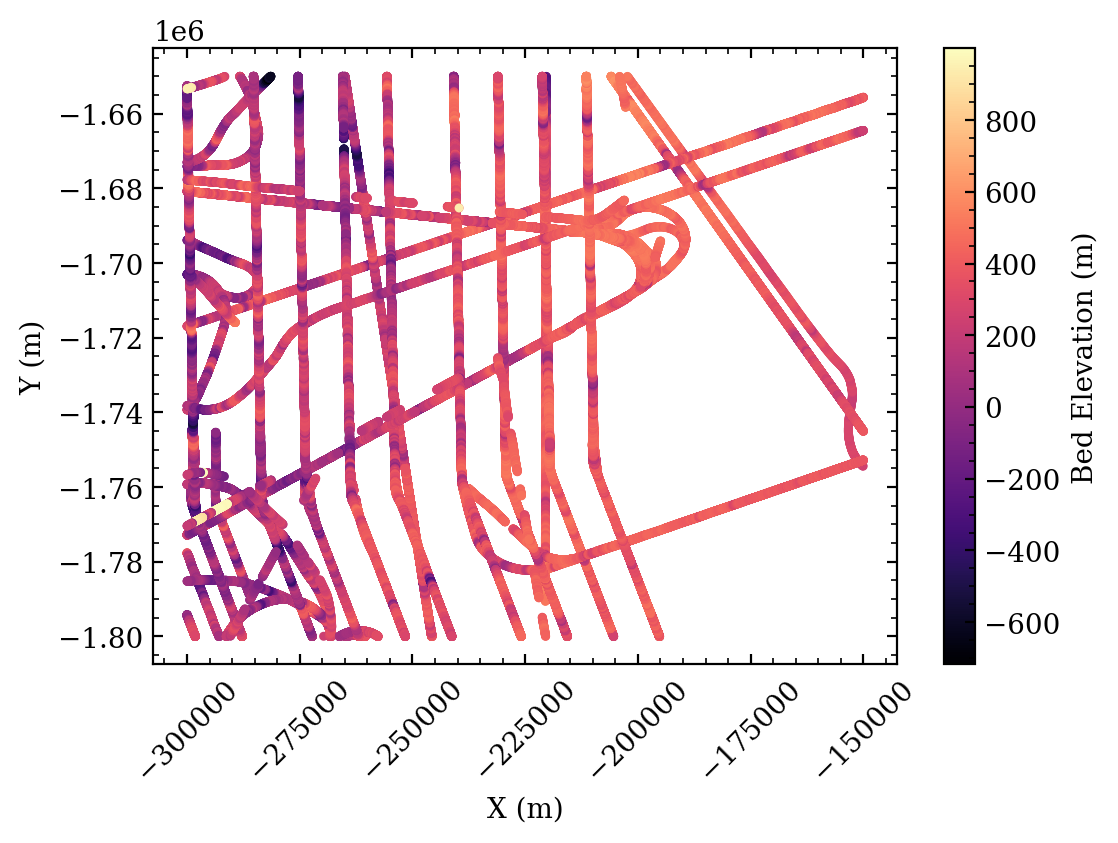

In [163]:
cmap = 'magma'
plt.scatter(df.X,df.Y,c=df.Bed,s=5,cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Bed Elevation (m)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.xticks(rotation=45);

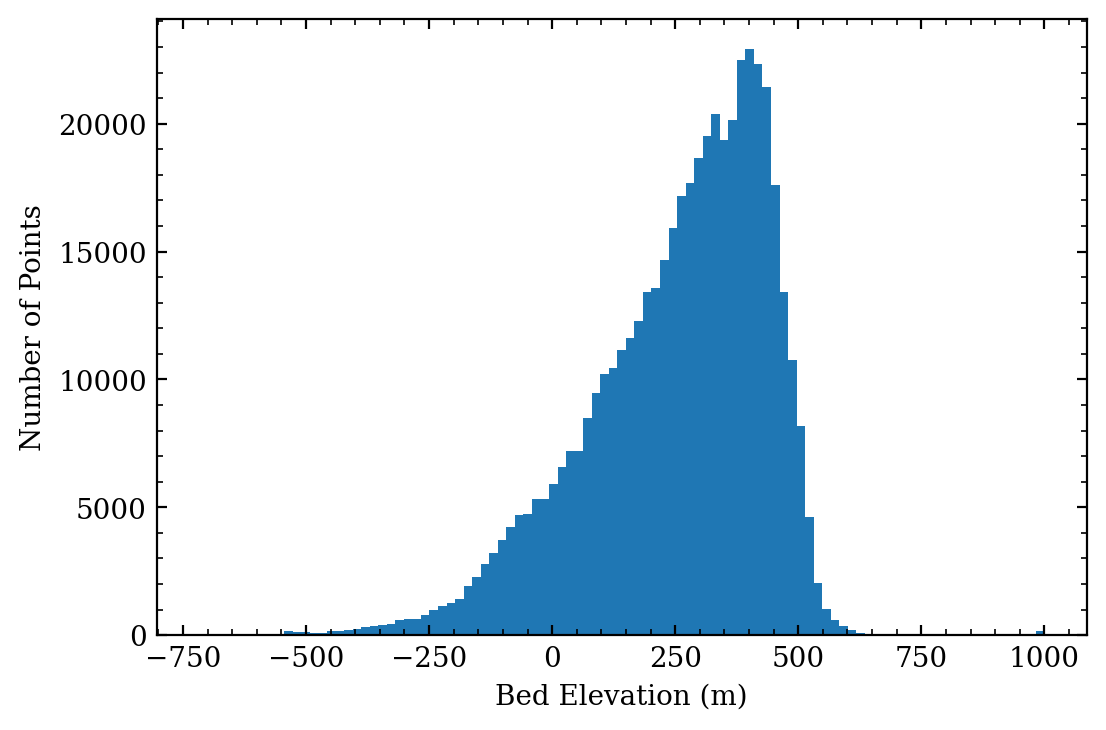

In [87]:
bins = np.linspace(np.min(df.Bed),np.max(df.Bed),100)
plt.hist(df.Bed,bins=bins)
plt.xlabel('Bed Elevation (m)')
plt.ylabel('Number of Points');

In [161]:
print('I would say that the points with elevation greater than ~650 meters count as outliers, as they are clearly outside of the distribution.\nThe gaussian has a tail extending to the low end, suggesting there may be some potential outliers in that region (< -500 m), or it could represent a natural phenomenon. \nHowever, deciphering this warrants a deeper analysis and a better understanding of the expected distribution of bed elevation levels. ')

I would say that the points with elevation greater than ~650 meters count as outliers, as they are clearly outside of the distribution.
The gaussian has a tail extending to the low end, suggesting there may be some potential outliers in that region (< -500 m), or it could represent a natural phenomenon. 
However, deciphering this warrants a deeper analysis and a better understanding of the expected distribution of bed elevation levels. 


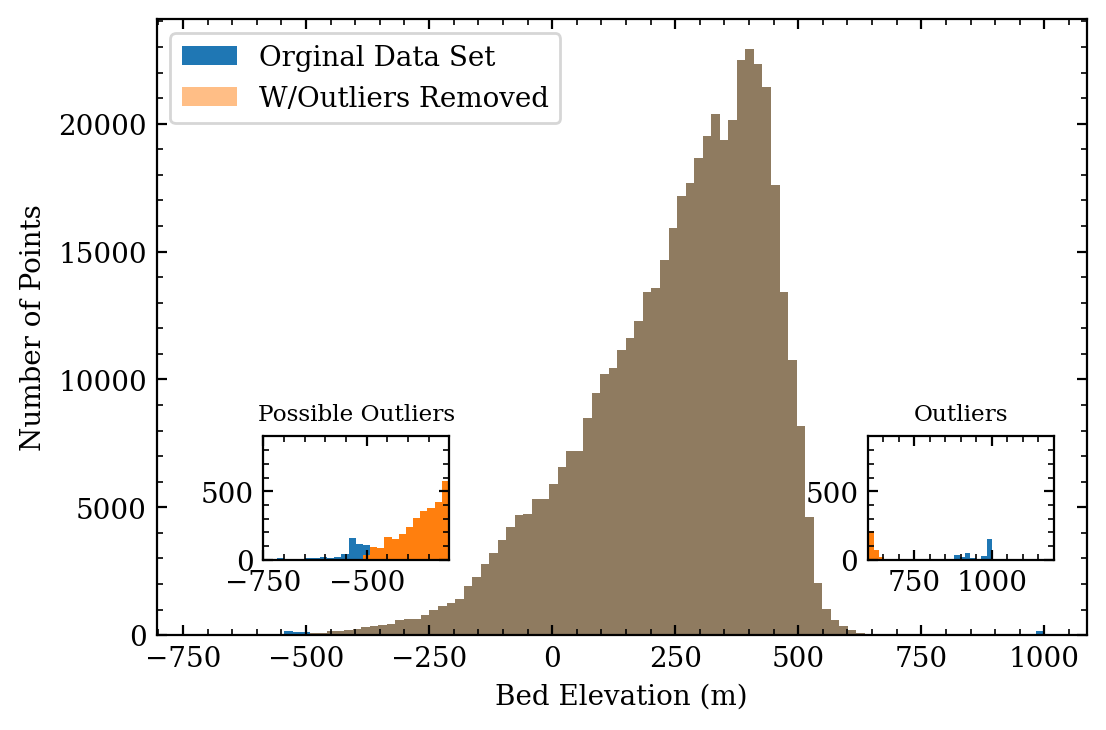

In [168]:

l_threshold = -500 #meters
u_threshold = 650 #meters
filtered_df = df[(df.Bed > l_threshold) & (df.Bed < u_threshold)]
filtered2_df = df[(df.Bed < u_threshold)]


fig, ax = plt.subplots()
ax.hist(df.Bed,bins=bins,label='Orginal Data Set')
ax.hist(filtered_df.Bed,alpha=0.5,bins=bins,label='W/Outliers Removed')

ax1 = inset_axes(ax,width='20%',height='20%',bbox_to_anchor=(0.1,0.1,1,1),bbox_transform=ax.transAxes,loc='lower left')
ax1.hist(df.Bed,bins=bins)
ax1.hist(filtered_df.Bed,bins=bins)
ax1.set_xlim(-750,-300)
ax1.set_ylim(0,900)
ax1.set_title("Possible Outliers",fontsize='small')


ax2 = inset_axes(ax,width='20%',height='20%',bbox_to_anchor=(0.75,0.1,1,1),bbox_transform=ax.transAxes,loc='lower left')
ax2.hist(df.Bed,bins=bins)
ax2.hist(filtered_df.Bed,bins=bins)
ax2.set_xlim(600,1200)
ax2.set_ylim(0,900)
ax2.set_title("Outliers",fontsize='small')

ax.set_xlabel('Bed Elevation (m)')
ax.set_ylabel('Number of Points')
ax.legend(loc='upper left');

In [100]:
removed = ((len(df) - len(filtered_df))/len(df)) * 100
print(f"Percent of data points removed: {removed:0.2f} %")

Percent of data points removed: 0.19 %


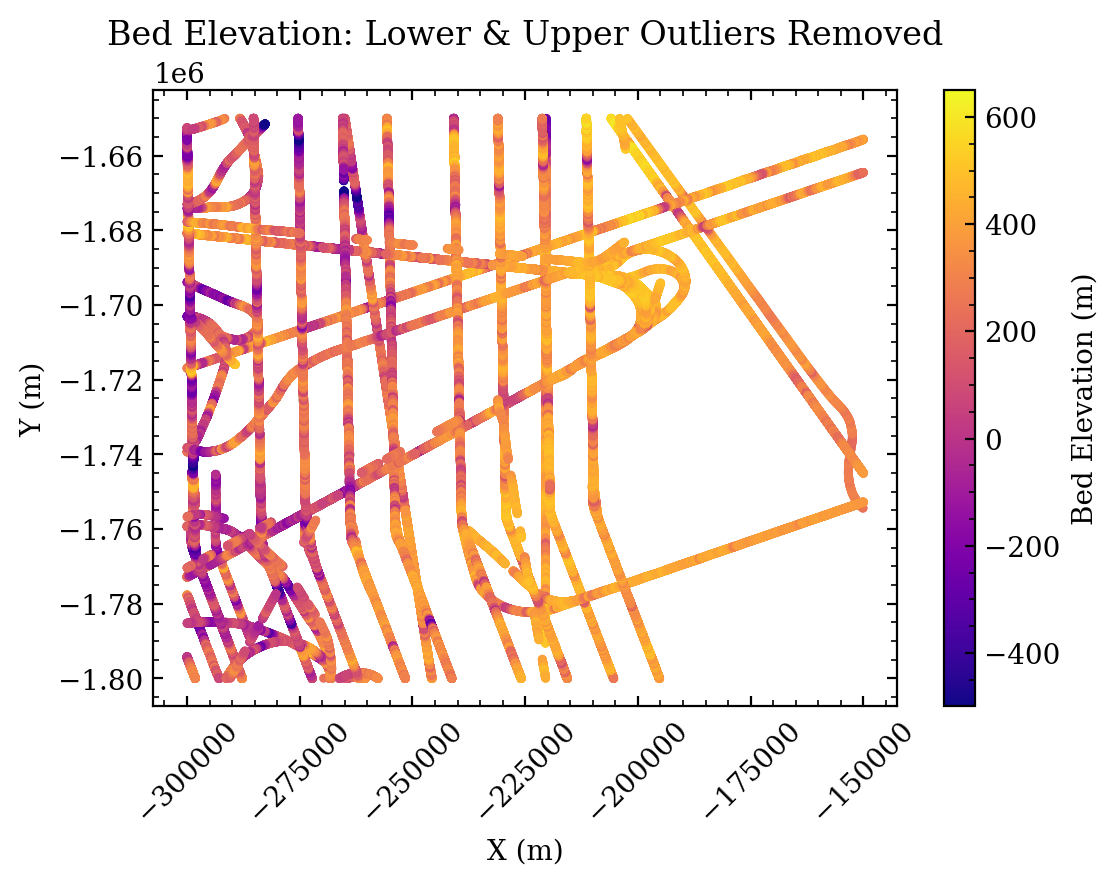

In [170]:
cmap = 'plasma'
plt.title('Bed Elevation: Lower & Upper Outliers Removed')
plt.scatter(filtered_df.X,filtered_df.Y,c=filtered_df.Bed,s=5,cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Bed Elevation (m)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.xticks(rotation=45);

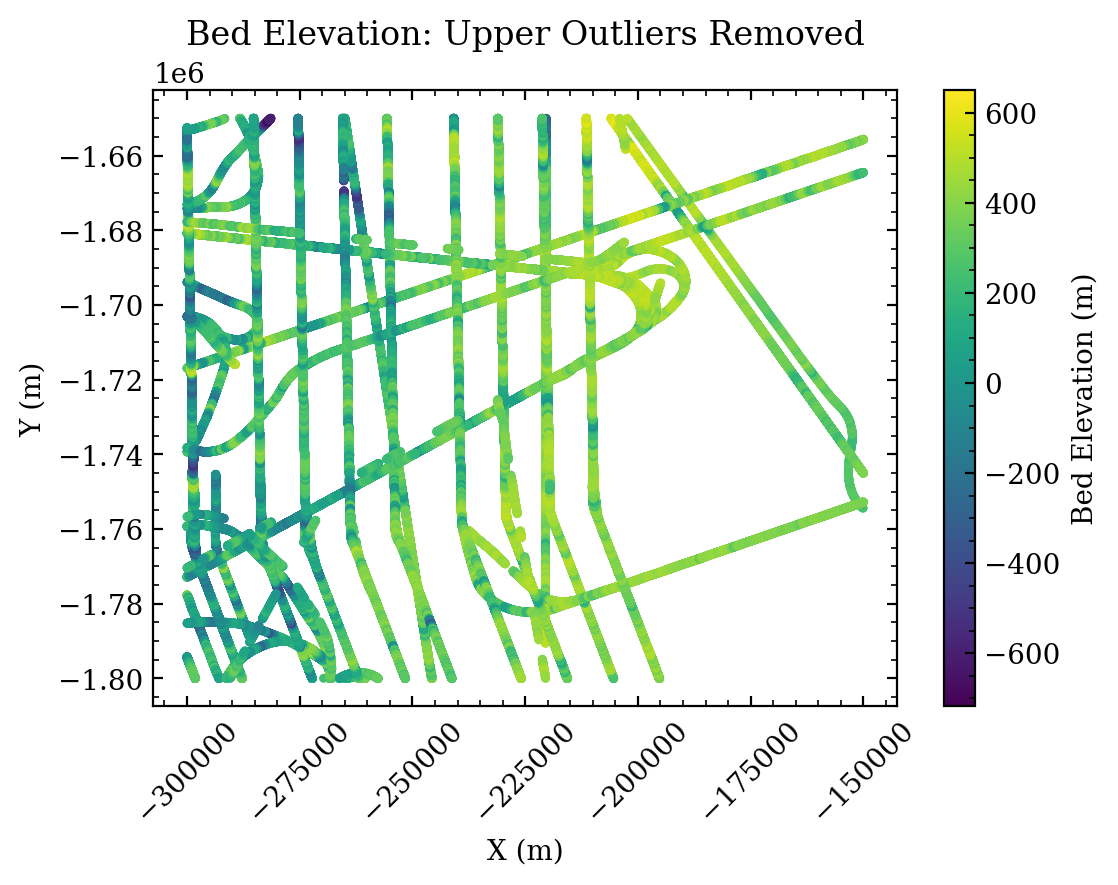

In [169]:
cmap = 'viridis'
plt.title('Bed Elevation: Upper Outliers Removed')
plt.scatter(filtered2_df.X,filtered2_df.Y,c=filtered2_df.Bed,s=5,cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Bed Elevation (m)')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.xticks(rotation=45);